In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [12]:
print('학습용 기사: ', X_train.shape[0])
print('테스트용 기사: ', X_test.shape[0])
num_classes = max(y_train) + 1
print('카테고리: ', num_classes)

학습용 기사:  8982
테스트용 기사:  2246
카테고리:  46


In [13]:
print(X_train[0])
print(y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이:  2376
뉴스 기사의 평균 길이:  145.5398574927633


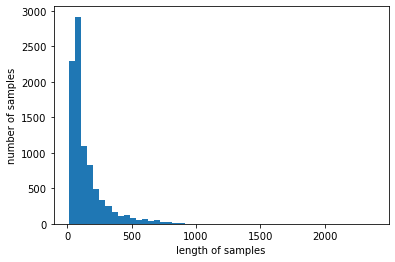

In [17]:
print('뉴스 기사의 최대 길이: ', max(len(l) for l in X_train))
print('뉴스 기사의 평균 길이: ', sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

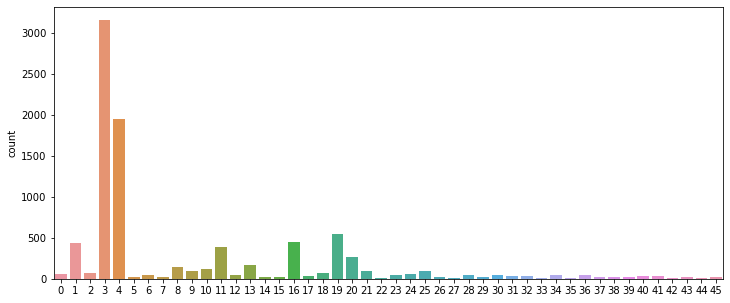

In [18]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [19]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [21]:
word_to_index = reuters.get_word_index()
#print(word_to_index)

In [22]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [23]:
print(index_to_word[101])

february


In [24]:
print(index_to_word[1])

the


### 2. LSTM으로 로이터 뉴스 분류하기

In [26]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [27]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [28]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# validation_data로 X_test, y_test 사용. val_loss가 줄어들다가 증가하는 상황이 오면 과적합으로 판단
history = model.fit(X_train, y_train, epochs=30, batch_size=128, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - 11s 159ms/step - loss: 2.6269 - accuracy: 0.3457 - val_loss: 2.4045 - val_accuracy: 0.3620
Epoch 2/30
71/71 [==============================] - 11s 148ms/step - loss: 2.1238 - accuracy: 0.4576 - val_loss: 1.9744 - val_accuracy: 0.5022
Epoch 3/30
71/71 [==============================] - 11s 149ms/step - loss: 1.8488 - accuracy: 0.5304 - val_loss: 1.8115 - val_accuracy: 0.5378
Epoch 4/30
71/71 [==============================] - 10s 147ms/step - loss: 1.8217 - accuracy: 0.5365 - val_loss: 1.9535 - val_accuracy: 0.5174
Epoch 5/30
71/71 [==============================] - 10s 147ms/step - loss: 1.7875 - accuracy: 0.5430 - val_loss: 1.7309 - val_accuracy: 0.5570
Epoch 6/30
71/71 [==============================] - 11s 159ms/step - loss: 1.6662 - accuracy: 0.5651 - val_loss: 1.6869 - val_accuracy: 0.5770
Epoch 7/30
71/71 [==============================] - 11s 153ms/step - loss: 1.6067 - accuracy: 0.5825 - val_loss: 1.6321 - val_accuracy: 0.5837

Epoch 28/30
71/71 [==============================] - 10s 145ms/step - loss: 0.6660 - accuracy: 0.8301 - val_loss: 1.3025 - val_accuracy: 0.7048
Epoch 00028: early stopping


In [42]:
print('테스트 정확도: ', (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 16ms/step - loss: 1.3025 - accuracy: 0.7048
테스트 정확도:  0.7048085331916809


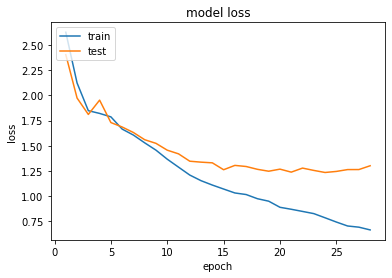

In [44]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()